In [5]:
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output

import pandas as pd

import torch
import torch.nn as nn
from transformers import PatchTSTForPrediction, PatchTSTConfig

%matplotlib inline

In [6]:
DIR_PATH = os.getcwd()

data_path = os.path.join(DIR_PATH, 'dataset')

## Imputation of the dataset

In [7]:
# import os
# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler

# # Charger les données
# df = pd.read_csv(os.path.join(data_path, 'test_france/NW2018.csv'))
# df["date"] = pd.to_datetime(df["date"])

# # Définition des colonnes
# col_distance = ["lat", "lon", "height_sta"]  # Colonnes utilisées pour mesurer la distance
# col_to_impute = ["dd", "ff", "precip", "hu", "td", "t", "psl"]  # Colonnes à imputer

# def imputer(group):
#     print(f"Processing group with {len(group)} rows")

#     # Vérifier qu'on a bien des données suffisantes
#     if len(group) < 2:
#         print("--1 pas assez de données")
#         return group  # Pas assez de données pour imputer

#     # Normalisation des colonnes de distance
#     scaler = StandardScaler()
#     df_scaled = group.copy()
#     df_scaled[col_distance] = scaler.fit_transform(df_scaled[col_distance])

#     # Vérification que seules les colonnes numériques sont sélectionnées
#     df_knn = df_scaled[col_distance + col_to_impute].select_dtypes(include=[np.number])

#     # Vérifier qu'il y a des colonnes à imputer après sélection
#     if df_knn.isna().sum().sum() == 0:
#         print("--2 pas de valeurs à imputer")
#         return group  # Pas de valeurs NaN, rien à imputer

#     # Appliquer KNNImputer
#     knn_imputer = KNNImputer(n_neighbors=5, weights="distance")
#     df_imputed = knn_imputer.fit_transform(df_knn)

#     # Assurer que la taille correspond bien
#     df_imputed = pd.DataFrame(df_imputed, columns=df_knn.columns, index=group.index)

#     # Mettre à jour uniquement les colonnes imputées
#     for col in col_to_impute:
#         if col in df_imputed.columns:
#             group[col] = df_imputed[col]

#     return group

# # Appliquer l'imputation par groupe de date
# df_imputed = df.drop(columns="number_sta").groupby("date").apply(imputer)

# df_imputed.reset_index(drop=True).to_csv(os.path.join(data_path, 'test_france/NW2018_imputed.csv'))

# df_imputed2 = pd.read_csv(os.path.join(data_path, 'test_france/NW2018_imputed.csv'), index_col=0)

# df_imputed2 = pd.concat([df["number_sta"], df_imputed2], axis=1)

# df_imputed3 = df_imputed2
# df_imputed3["date"] = pd.to_datetime(df_imputed3["date"])
# df_imputed3 = df_imputed3.groupby("number_sta").apply(lambda x: x.sort_values("date").interpolate(method="linear")).reset_index(drop=True)
# df_imputed3.to_csv(os.path.join(data_path, 'test_france/NW2018_imputed_interpolated.csv'))

In [8]:
df = pd.read_csv(os.path.join(data_path, 'test_france/NW2018.csv'))

In [9]:
from skrub import TableReport

TableReport(df)

Processing column  12 / 12


,,,,,,,,,,,,


In [11]:
df_imputed = pd.read_csv(os.path.join(data_path, 'test_france/NW2018_imputed_interpolated.csv'), index_col=0)
df_imputed 

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,14066001,49.330,-0.430,2.0,2018-01-01 00:00:00,240.0,8.2,0.0,84.0,276.75,279.25,100983.893351
1,14066001,49.330,-0.430,2.0,2018-01-01 00:06:00,240.0,7.9,0.0,84.0,276.75,279.25,100896.762568
2,14066001,49.330,-0.430,2.0,2018-01-01 00:12:00,240.0,8.1,0.0,85.0,277.05,279.35,100965.817156
3,14066001,49.330,-0.430,2.0,2018-01-01 00:18:00,240.0,7.8,0.0,86.0,277.15,279.35,100965.226479
4,14066001,49.330,-0.430,2.0,2018-01-01 00:24:00,250.0,7.6,0.2,87.0,277.55,279.55,100627.958907
...,...,...,...,...,...,...,...,...,...,...,...,...
22034566,95690001,49.108,1.831,126.0,2018-12-31 23:30:00,280.0,2.4,0.0,98.0,279.75,280.05,103769.188719
22034567,95690001,49.108,1.831,126.0,2018-12-31 23:36:00,280.0,2.7,0.0,98.0,279.75,280.05,103761.798674
22034568,95690001,49.108,1.831,126.0,2018-12-31 23:42:00,290.0,2.7,0.0,98.0,279.75,280.05,103754.518391
22034569,95690001,49.108,1.831,126.0,2018-12-31 23:48:00,290.0,2.5,0.0,97.0,279.65,280.05,103731.770134


In [ ]:
sorted(list(df_imputed["date"].unique()))

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-01-01 00:06:00'),
 Timestamp('2018-01-01 00:12:00'),
 Timestamp('2018-01-01 00:18:00'),
 Timestamp('2018-01-01 00:24:00'),
 Timestamp('2018-01-01 00:30:00'),
 Timestamp('2018-01-01 00:36:00'),
 Timestamp('2018-01-01 00:42:00'),
 Timestamp('2018-01-01 00:48:00'),
 Timestamp('2018-01-01 00:54:00'),
 Timestamp('2018-01-01 01:00:00'),
 Timestamp('2018-01-01 01:06:00'),
 Timestamp('2018-01-01 01:12:00'),
 Timestamp('2018-01-01 01:18:00'),
 Timestamp('2018-01-01 01:24:00'),
 Timestamp('2018-01-01 01:30:00'),
 Timestamp('2018-01-01 01:36:00'),
 Timestamp('2018-01-01 01:42:00'),
 Timestamp('2018-01-01 01:48:00'),
 Timestamp('2018-01-01 01:54:00'),
 Timestamp('2018-01-01 02:00:00'),
 Timestamp('2018-01-01 02:06:00'),
 Timestamp('2018-01-01 02:12:00'),
 Timestamp('2018-01-01 02:18:00'),
 Timestamp('2018-01-01 02:24:00'),
 Timestamp('2018-01-01 02:30:00'),
 Timestamp('2018-01-01 02:36:00'),
 Timestamp('2018-01-01 02:42:00'),
 Timestamp('2018-01-

In [42]:
import pandas as pd
import torch
from torch.utils.data import Dataset

def split_dataset(data_path: str, test_size: float = 0.2, window_size: int = 100, sliding_window: int = 1, forecasting_horizon: int = 10, validation_size: float = 0.):
    """
    Charge les données et les divise en ensembles d'entraînement, de test et de validation.

    Args:
        data_path (str): Chemin vers le fichier CSV contenant les données.
        test_size (float, optional): Taille de l'ensemble de test. Defaults to 0.2.
        window_size (int, optional): Taille de la fenêtre d'observation. Defaults to 100.
        sliding_window (int, optional): Taille du pas de glissement. Defaults to 1.
        forecasting_horizon (int, optional): Horizon de prédiction. Defaults to 10.
        validation_size (float, optional): Taille de l'ensemble de validation. Defaults to 0.1.
    """

    df = pd.read_csv(data_path, index_col=0)

    date_list = sorted(list(df["date"].unique()))

    train_dates = date_list[:-int((test_size + validation_size)*len(date_list))]
    val_dates = date_list[-int((test_size + validation_size)*len(date_list)):-int(test_size*len(date_list))]
    test_dates = date_list[-int(test_size*len(date_list)):]

    df_train = df[df["date"].isin(train_dates)]
    df_val = df[df["date"].isin(val_dates)]
    df_test = df[df["date"].isin(test_dates)]   


    train_dataset = SlidingWindowDatasetDF(df_train, window_size=window_size, sliding_size=sliding_window, forecasting_horizon=forecasting_horizon)
    val_dataset = SlidingWindowDatasetDF(df_val, window_size=window_size, sliding_size=sliding_window, forecasting_horizon=forecasting_horizon)
    test_dataset = SlidingWindowDatasetDF(df_test, window_size=window_size, sliding_size=sliding_window, forecasting_horizon=forecasting_horizon)

    return train_dataset, val_dataset, test_dataset


class SlidingWindowDatasetDF(Dataset):
    def __init__(self, data: pd.DataFrame, window_size: int = 100, 
                 sliding_size: int = 1, forecasting_horizon: int = 10):
        """
        Classe permettant de créer des séries temporelles issues d'une même station météorologique.
        Le dataset est organisé de manière à générer des fenêtres temporelles continues pour chaque station.

        Args:
            data (pd.DataFrame): Données d'entrée, doit contenir 'number_sta' et 'date'.
            window_size (int, optional): Taille de la fenêtre d'observation. Defaults to 100.
            sliding_size (int, optional): Taille du pas de glissement. Defaults to 1.
            forecasting_horizon (int, optional): Horizon de prédiction. Defaults to 10.
        """
        super(SlidingWindowDatasetDF, self).__init__()

        # Vérifier que les colonnes nécessaires existent
        required_columns = {'number_sta', 'date'}
        if not required_columns.issubset(set(data.columns)):
            raise ValueError(f"Les colonnes {required_columns} doivent être présentes dans le dataset.")

        # Convertir 'date' en datetime et trier les données
        self.data = data.copy()
        data = data.sort_values(by=['number_sta', 'date'])

        # Stocker les groupes par station
        self.groups = {sta: group for sta, group in data.groupby('number_sta')}

        self.window_size = window_size
        self.sliding_size = sliding_size
        self.forecasting_horizon = forecasting_horizon

        # Stocker les séquences indexées par (station, index local)
        self.sequences = []
        for sta, group in self.groups.items():
            num_sequences = (len(group) - self.window_size - self.forecasting_horizon) // self.sliding_size + 1
            for idx in range(num_sequences):
                self.sequences.append((sta, idx * self.sliding_size))

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        """
        Récupère une fenêtre temporelle d'une station spécifique et retourne un DataFrame.

        Args:
            idx (int): Index de la séquence.

        Returns:
            pd.DataFrame: Contenant la série temporelle observée (X) et la série future (Y).
        """
        number_sta, local_idx = self.sequences[idx]
        station_data = self.groups[number_sta]

        # Définition des indices de la fenêtre
        x_window = station_data.iloc[local_idx:local_idx+self.window_size].drop(columns=['number_sta', 'lat', 'lon', 'height_sta'])
        y_window = station_data.iloc[local_idx+self.window_size:local_idx+self.window_size+self.forecasting_horizon].drop(columns=['number_sta', 'lat', 'lon', 'height_sta'])

        x = torch.tensor(x_window.drop(columns='date').values, dtype=torch.float32).T
        y = torch.tensor(y_window.drop(columns='date').values, dtype=torch.float32).T

        return x, y, list(x_window['date']), list(y_window['date'])

In [59]:
train_dataset, val_dataset, test_dataset = split_dataset(os.path.join(data_path, 'test_france/NW2018_imputed_interpolated.csv'), 
                                                         test_size=0.2, 
                                                         window_size=100, 
                                                         sliding_window=1, 
                                                         forecasting_horizon=10, 
                                                         validation_size=0.1)

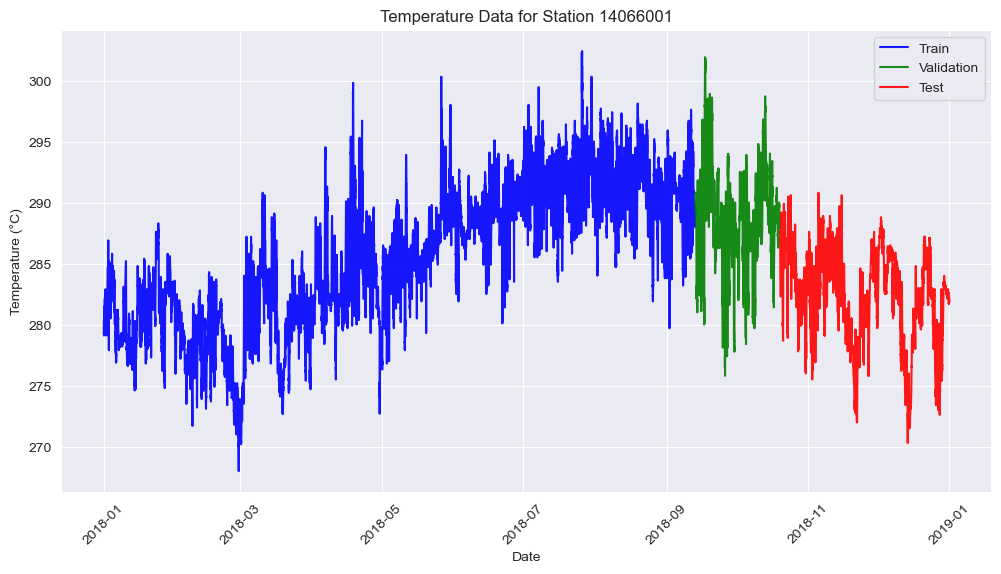

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

train_df = train_dataset.data
val_df = val_dataset.data
test_df = test_dataset.data

# Ensure 'date' is in datetime format
train_df["date"] = pd.to_datetime(train_df["date"])
val_df["date"] = pd.to_datetime(val_df["date"])
test_df["date"] = pd.to_datetime(test_df["date"])

# Define the station ID
station_id = 14066001

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot Train data
plt.plot(train_df[train_df["number_sta"] == station_id]["date"], 
         train_df[train_df["number_sta"] == station_id]["t"], 
         label="Train", color="blue", alpha=0.9)

# Plot Validation data
plt.plot(val_df[val_df["number_sta"] == station_id]["date"], 
         val_df[val_df["number_sta"] == station_id]["t"], 
         label="Validation", color="green", alpha=0.9)

# Plot Test data
plt.plot(test_df[test_df["number_sta"] == station_id]["date"], 
         test_df[test_df["number_sta"] == station_id]["t"], 
         label="Test", color="red", alpha=0.9)

# Labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Data for Station 14066001")
plt.legend()

# Autoformat date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


In [47]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 6))
sns.set_style("darkgrid")

train_df = train_dataset.data
val_df = val_dataset.data
test_df = test_dataset.data


axes.plot(pd.to_datetime(train_df[train_df["number_sta"] == 14066001]["date"]), train_df[train_df["number_sta"] == 14066001]["t"], label="Train", color="blue", alpha=0.9)
# axes.plot(val_df[val_df["number_sta"] == 14066001]["date"], val_df[val_df["number_sta"] == 14066001]["t"], label="Validation", color="green", alpha=0.9)
# axes.plot(test_df[test_df["number_sta"] == 14066001]["date"], test_df[test_df["number_sta"] == 14066001]["t"], label="Test", color="red", alpha=0.9)

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Representation of the data, divided into training, validation and test sets")
plt.xlim(train_df.index.min(), test_df.index.max())

plt.legend()
plt.show()


ValueError: Date ordinal 22034570.0 converts to 62298-08-09T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1700x600 with 1 Axes>